In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#questions about importing from sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [2]:
df = pd.read_excel('census data.xlsx')


In [3]:
df["income"] = df["income"].map(lambda x: 1 if (x == ">50K") else 0)

In [4]:
X = df[[col for col in df.columns if col != 'income']]
y = df["income"]

In [5]:
X = pd.get_dummies(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [8]:
#logistic regression
lr_model = LogisticRegression(C=1)
lr_model.fit(X_train, y_train)
result = lr_model.predict(X_test)

In [9]:
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8036646534957519
0.7147806004618937
0.2703056768558952
0.39226869455006336


<AxesSubplot:>

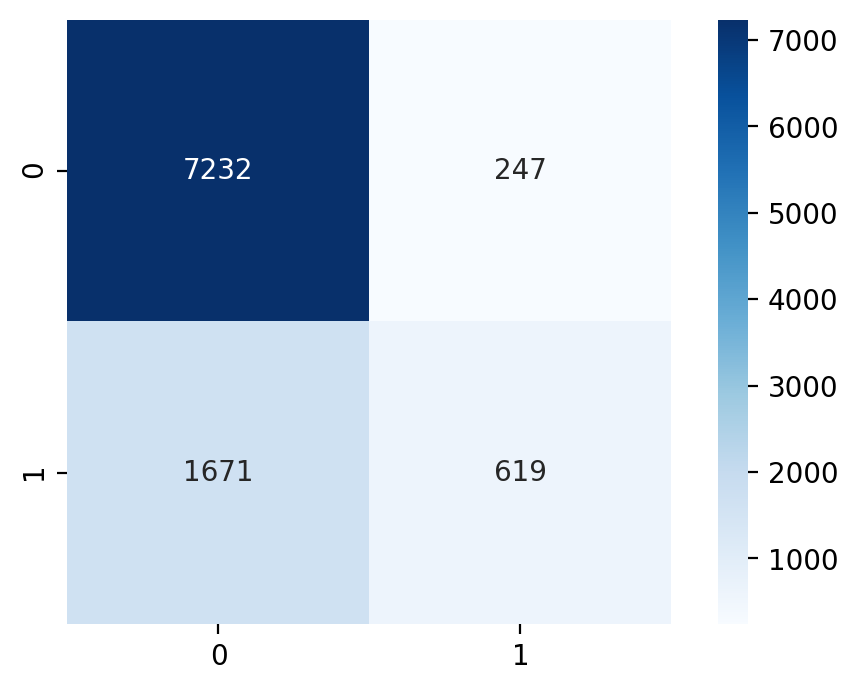

In [10]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [11]:
acc = []
recall = []
precision = []
f1 = []
n = 100

while n < 2000:
    lr_model = LogisticRegression(C=n)
    lr_model.fit(X_train, y_train)
    result = lr_model.predict(X_test)
    acc.append(accuracy_score(y_test,result))
    precision.append(precision_score(y_test,result))
    recall.append(recall_score(y_test,result))
    f1.append(f1_score(y_test,result))
    print(n)
    n = n + 100

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


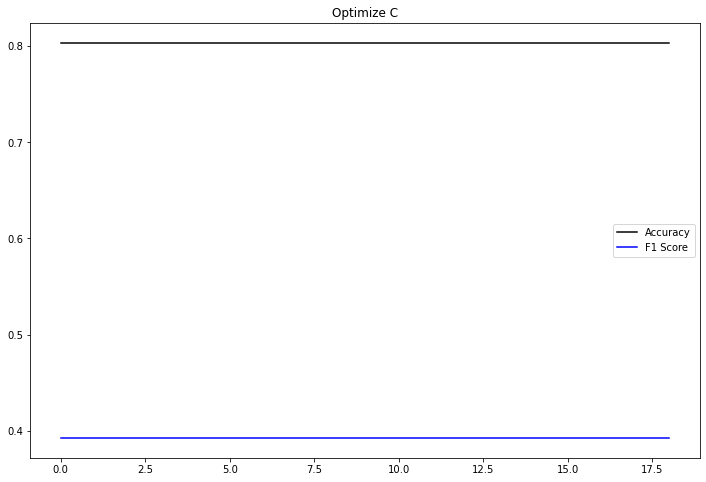

In [12]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc, color = 'black', label = 'Accuracy')
ax.plot(f1[-len(acc):], color = 'b', label = 'F1 Score')
ax.set_title ("Optimize C")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [14]:
acc = []
recall = []
precision = []
f1 = []
n = 1

while n < 10:
    lr_model = LogisticRegression(class_weight={0:1,1:n})
    lr_model.fit(X_train, y_train)
    result = lr_model.predict(X_test)
    acc.append(accuracy_score(y_test,result))
    precision.append(precision_score(y_test,result))
    recall.append(recall_score(y_test,result))
    f1.append(f1_score(y_test,result))
    print(n)
    n = n + 1

1
2
3
4


/Users/matthew.redmond@usfoods.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5
6
7
8
9


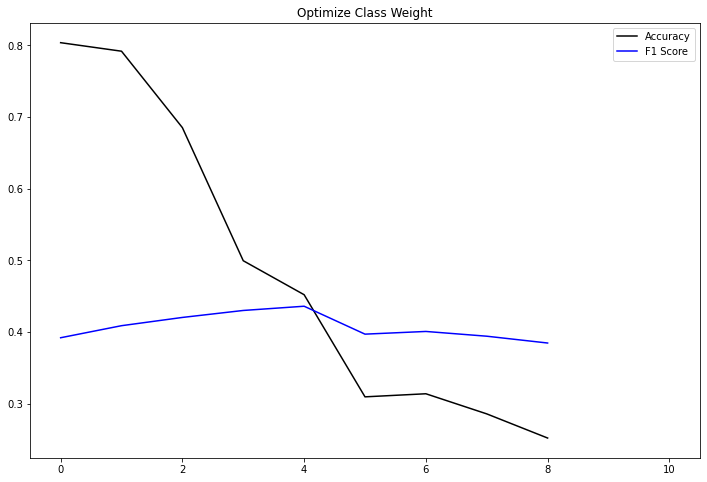

In [15]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc, color = 'black', label = 'Accuracy')
ax.plot(f1[-len(acc):], color = 'b', label = 'F1 Score')
ax.set_title ("Optimize Class Weight")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [16]:
print(acc)
print(precision)
print(recall)
print(f1)

[0.8036646534957519, 0.7917903572525335, 0.6852287849319275, 0.49964172382024774, 0.4522469034701607, 0.309857713174327, 0.3141570273313543, 0.28610912068789024, 0.2524311597911762]
[0.7147806004618937, 0.6111111111111112, 0.3699038780245277, 0.2934817170111288, 0.28746007498958476, 0.2497751798561151, 0.25213579136690645, 0.24615217862562325, 0.23844307628091413]
[0.2703056768558952, 0.3074235807860262, 0.4873362445414847, 0.8061135371179039, 0.9039301310043668, 0.9703056768558952, 0.9794759825327511, 0.991703056768559, 0.9978165938864629]
[0.39226869455006336, 0.40906449738524114, 0.4205765969474279, 0.4303030303030303, 0.4362027183647666, 0.39728231718219204, 0.40103701054890034, 0.39440778047933306, 0.38490693169375895]
